In [2]:
import pandas as pd

In [3]:
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/Cars93.csv")

In [4]:
A

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


# missing data treatment

In [5]:
A.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [6]:
from Wd8pm import replacer
    

In [7]:
replacer(A)

In [8]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# Outliers removal

In [9]:
from Wd8pm import OL

In [10]:
OL(A)

[16, 38, 41, 47, 58, 59]

In [11]:
outlier=OL(A)

In [12]:
A=A.drop(index=outlier,axis=0)

In [13]:
A.shape

(87, 28)

In [14]:
A.index=range(0,87)

# Define X and Y

In [15]:
Y = A[["Price"]]
X = A.drop(labels=["Price","id","Make","Model"],axis=1)



# check correlation

In [16]:
Q=A.corr()["Price"]
Q.sort_values()


MPG.city             -0.703633
MPG.highway          -0.626498
Rev.per.mile         -0.458679
id                   -0.204054
RPM                  -0.060176
Passengers            0.059701
Luggage.room          0.371466
Rear.seat.room        0.382788
Turn.circle           0.459958
Wheelbase             0.499039
Width                 0.535804
Length                0.536407
EngineSize            0.632183
Weight                0.689606
Fuel.tank.capacity    0.700509
Horsepower            0.801048
Min.Price             0.975467
Max.Price             0.980614
Price                 1.000000
Name: Price, dtype: float64

In [17]:
Q=Q[Q!=1]
Q=Q[(Q<-0.7) |(Q>0.7)]
Q.index

Index(['Min.Price', 'Max.Price', 'MPG.city', 'Horsepower',
       'Fuel.tank.capacity'],
      dtype='object')

# find categorical 

In [18]:
con = []
cat = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        



In [19]:
con

['Min.Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [20]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [21]:
from Wd8pm import anova

# check anova

In [22]:
anova("Price","Type",A)

,df,sum_sq,mean_sq,F,PR(>F)
Type,5.0,2408.115595,481.623119,11.698636,1.592018e-08
Residual,81.0,3334.702566,41.169167,NaN,NaN


In [23]:
anova("Price","Model",A)

C:\Users\Suja4\anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


,df,sum_sq,mean_sq,F,PR(>F)
Model,86.0,5.742818e+03,66.776955,0.0,NaN
Residual,0.0,9.486210e-26,inf,NaN,NaN


In [24]:
anova("Price","Origin",A)

,df,sum_sq,mean_sq,F,PR(>F)
Origin,1.0,8.297207,8.297207,0.122985,0.726686
Residual,85.0,5734.520954,67.464952,NaN,NaN


In [25]:

anova("Price","Manufacturer",A)

,df,sum_sq,mean_sq,F,PR(>F)
Manufacturer,30.0,3468.619673,115.620656,2.84705,0.000355
Residual,56.0,2274.198488,40.610687,NaN,NaN


In [26]:
anova("Price","Make",A)

C:\Users\Suja4\anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


,df,sum_sq,mean_sq,F,PR(>F)
Make,86.0,5.742818e+03,66.776955,0.0,NaN
Residual,0.0,6.783257e-26,inf,NaN,NaN


# final predictors

In [27]:
Y = A[["Price"]]
X = A[['MPG.city','Horsepower','Fuel.tank.capacity','Manufacturer','Type','AirBags',
 'DriveTrain', 'Cylinders','Man.trans.avail']]

In [28]:
con = []
cat = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        

In [29]:
X1 = pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew = X2.join(X1)

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     19.44
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           9.86e-10
Time:                        20:09:28   Log-Likelihood:                -110.83
No. Observations:                  69   AIC:                             319.7
Df Residuals:                      20   BIC:                             429.1
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          7.8976      0.623     12.674      0.000       6.598       9.197
MPG.city                       1.7751      1.238      1.434      0.167      -0.807       4.358
Horsepower                     3.1993      1.055      3.034      0.007       1.000       5.399
Fuel.tank.capacity             1.4702      1.260      1.166      0.257      -1.159       4.100
Manufacturer_Acura             8.1251      3.326      2.443      0.024       1.186      15.064
Manufacturer_Audi              9.7142      3.268      2.973      0.008       2.898      16.530
Manufacturer_BMW              -3.6213      4.305     -0.841      0.410     -12.601       5.359
Manufacturer_Buick            -4.9879      2.017     -2.472      0.023      -9.196      -0.779
Manufacturer_Cadillac         16.4916      3.740      4.409      0.000       8.689      24.294
Manufacturer_Chevrolet        -4.6570      1.387     -3.358      0.003      -7.549      -1.764
Manufacturer_Chrylser         -5.0814      2.806     -1.811      0.085     -10.935       0.772
Manufacturer_Chrysler          3.2909      2.185      1.506      0.148      -1.268       7.850
Manufacturer_Dodge            -3.2815      1.721     -1.907      0.071      -6.871       0.308
Manufacturer_Eagle            -4.5657      1.901     -2.402      0.026      -8.531      -0.600
Manufacturer_Ford             -3.2173      1.022     -3.148      0.005      -5.349      -1.085
Manufacturer_Geo              -4.1096      2.843     -1.445      0.164     -10.040       1.821
Manufacturer_Honda             0.9395      2.334      0.403      0.692      -3.929       5.808
Manufacturer_Hyundai          -3.8975      1.675     -2.326      0.031      -7.393      -0.403
Manufacturer_Lexus             2.1003      2.714      0.774      0.448      -3.560       7.761
Manufacturer_Lincoln          12.0976      1.954      6.192      0.000       8.022      16.173
Manufacturer_Mazda            -2.6115      2.405     -1.086      0.290      -7.628       2.405
Manufacturer_Mercedes-Benz    13.1060      3.032      4.323      0.000       6.781      19.431
Manufacturer_Mercury         -11.1609      3.718     -3.002      0.007     -18.917      -3.405
Manufacturer_Mitsubishi       -2.9420      2.372     -1.240      0.229      -7.890       2.006
Manufacturer_Nissan           -3.3578      1.822     -1.843      0.080      -7.158       0.443
Manufacturer_Oldsmobile       -5.4466      2.232     -2.440      0.024     -10.103      -0.790
Manufacturer_Plymouth         -1.4196      4.732     -0.300      0.767     -11.291       8.452
Manufacturer_Pontiac          -2.8223      1.409     -2.003      0.059      -5.762       0.117
Manufacturer_Saab             10.7065      2.694      3.974      0.001       5.086      16.327
Manufacturer_Saturn           -1.0334      

In [31]:
ols.pvalues.sort_values().index[-1]

'Manufacturer_Subaru'

In [32]:
ols.pvalues.sort_values()

const                         5.147794e-11
Manufacturer_Lincoln          4.763130e-06
Man.trans.avail_Yes           2.686307e-04
Manufacturer_Cadillac         2.704137e-04
Manufacturer_Mercedes-Benz    3.309968e-04
AirBags_Driver only           7.040310e-04
Manufacturer_Saab             7.480279e-04
DriveTrain_Rear               1.441579e-03
Type_Large                    2.831713e-03
Manufacturer_Chevrolet        3.127136e-03
AirBags_None                  4.164311e-03
Manufacturer_Ford             5.060324e-03
Type_Midsize                  5.457504e-03
Horsepower                    6.556670e-03
Manufacturer_Mercury          7.050551e-03
Manufacturer_Audi             7.521843e-03
Cylinders_6                   2.007221e-02
Manufacturer_Buick            2.252414e-02
Manufacturer_Acura            2.399038e-02
Manufacturer_Oldsmobile       2.412956e-02
Manufacturer_Eagle            2.616485e-02
Manufacturer_Hyundai          3.063471e-02
Man.trans.avail_No            3.311684e-02
Cylinders_r

In [33]:
round(ols.rsquared_adj,4)

0.9286

# Final model after elimination

In [50]:
Xnew = Xnew.drop(labels=ols.pvalues.sort_values().index[-1],axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
ols = OLS(ytrain,xconst).fit()
round(ols.rsquared_adj,4),ols.pvalues.sort_values().index[-1]

(0.9448, 'Manufacturer_Geo')

In [51]:
Xnew.columns

Index(['Horsepower', 'Manufacturer_Acura', 'Manufacturer_Audi',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrylser', 'Manufacturer_Chrysler', 'Manufacturer_Dodge',
       'Manufacturer_Eagle', 'Manufacturer_Ford', 'Manufacturer_Geo',
       'Manufacturer_Hyundai', 'Manufacturer_Lincoln',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mercury',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Pontiac', 'Manufacturer_Saab', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Type_Large', 'Type_Midsize', 'Type_Small',
       'Type_Van', 'AirBags_Driver & Passenger', 'AirBags_Driver only',
       'AirBags_None', 'DriveTrain_4WD', 'DriveTrain_Front', 'DriveTrain_Rear',
       'Cylinders_4', 'Cylinders_6', 'Cylinders_rotary', 'Man.trans.avail_No',
       'Man.trans.avail_Yes'],
      dtype='object')

# model

In [52]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [53]:
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [54]:
tr_err,ts_err

(0.9707809445631471, 3.443979375926664)

# Ridge

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
rr = Ridge(alpha=3.91)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(2.5312802168379482, 2.501528813418982)

In [88]:
x = .01
alphas = []
for i in range(0,40,1):
    alphas.append(x)
    x = round(x + 0.1,2)

In [89]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)    

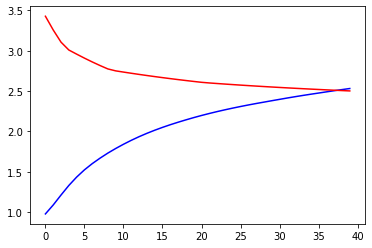

In [90]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

In [94]:
alphas[-1]

3.91

# Gridsearch CV

In [95]:
tuning_grid = {"alpha":alphas}
rr = Ridge()
from sklearn.model_selection import GridSearchCV
cv1 = GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=7)
cvmodel = cv1.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 0.61}

In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.61)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(1.6013131884062046, 2.860424251266502)

In [97]:
model.coef_

array([[ 3.90556935,  3.26842402,  5.79189382, -3.08264427,  6.09268922,
        -4.65574128, -1.74486294,  2.50987694, -3.81823392, -2.24240748,
        -3.35274699, -2.23951267, -3.50414273,  7.38946346,  7.21922823,
        -5.05329464, -2.87312141, -2.81623165, -1.7866297 ,  5.39378661,
        -1.95402387,  1.98749646,  2.82724119,  4.49511145, -3.09450837,
         3.24076313, -0.68644002,  1.24059097, -0.55415094, -0.83553765,
        -0.10378949,  0.93932713, -0.41301453,  0.948273  ,  1.26333698,
        -1.04248644,  1.04248644]])

In [100]:
Q = pd.DataFrame([Xnew.columns,model.coef_]).T
Q.columns=["Column","Coef"]
Q.sort_values(by="Coef")

,Column,Coef
0,Horsepower,"[3.9055693494972465, 3.268424021578661, 5.7918..."
1,Manufacturer_Acura,None
2,Manufacturer_Audi,None
3,Manufacturer_Buick,None
4,Manufacturer_Cadillac,None
5,Manufacturer_Chevrolet,None
6,Manufacturer_Chrylser,None
7,Manufacturer_Chrysler,None
8,Manufacturer_Dodge,None
9,Manufacturer_Eagle,None


# new model using random state 43,ridge

In [555]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=43,test_size=0.2)

In [556]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.2)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(1.5931149394197288, 2.7363316377012796)

# Lasso model 

In [557]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

In [558]:
x = 0.10
alphas = []
for i in range(0,200,1):
    alphas.append(x)
    x = round(x + 0.001,5)

In [72]:
tr = []
ts = []
for i in alphas:
    rr = Lasso(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

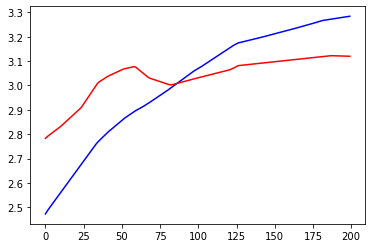

In [73]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

In [74]:
tuning_grid = {"alpha":alphas}
rr = Ridge()
from sklearn.model_selection import GridSearchCV
cv1 = GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=7)
cvmodel = cv1.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 0.299}

# best alpha .299

In [562]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
rr = Lasso(alpha=0.299)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(3.283828750210348, 3.1197658915435036)

# random state 43

In [563]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=43,test_size=0.2)

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
rr = Lasso(alpha=0.299)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(3.283828750210348, 3.1197658915435036)

In [71]:
model.coef_

array([ 5.46342448,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  2.85344631, -1.54827682,
        0.        ,  0.        ,  0.29958296, -0.8875889 , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ])